This notebook will be used to fit a beta distribution to the weighted distribution used in: 
Poverty Traps and the Social Protection Paradox
Munenobu Ikegami, Michael R. Carter, Christopher B. Barrett, Sarah Janzen
Chapter URL: http://www.nber.org/chapters/c13834  (p. 223 – 256)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
0.983 0.056665686266028754
4.132824665213334 0.071473061351604


/Users/victoria/opt/anaconda3/envs/dgl_ptm/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/victoria/opt/anaconda3/envs/dgl_ptm/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


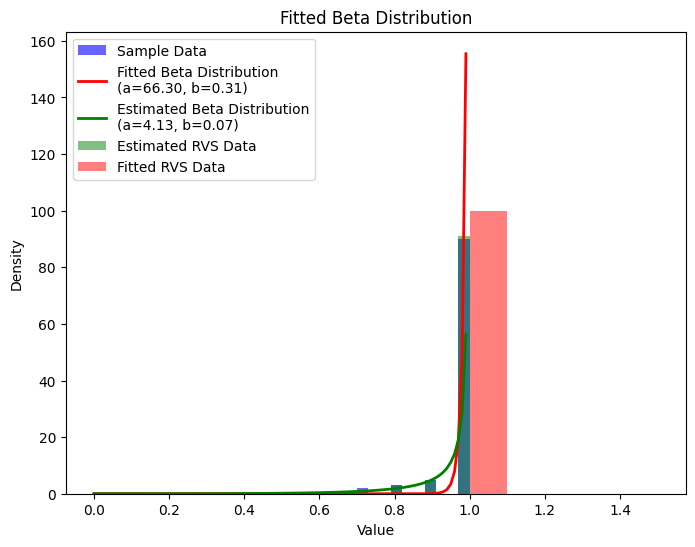

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the weighted distribution
weights = np.array([0.02, 0.03, 0.05, 0.9])
values = np.array([0.7, 0.8, 0.9, 1.0])
sample=2*[0.7]+3*[0.8]+5*[0.9]+90*[1.0]

mu = np.sum(weights*values)
sigma = np.sqrt(np.sum(weights*(values-mu)**2))
print(mu, sigma)

# Fit the beta distribution
est_alpha = mu * (mu * (1 - mu) / sigma**2 - 1)
est_beta = (1-mu) * (mu * (1 - mu) / sigma**2 - 1)
print(est_alpha, est_beta)

a, b, loc, scale = beta.fit(sample, loc=0, scale=1)

# Generate a range of values for plotting the beta distribution
x = np.linspace(0, 1, 100)
y = beta.pdf(x, a, b, loc=0, scale=1)
z = beta.pdf(x, est_alpha, est_beta, loc=0, scale=1)
j = np.round(beta.rvs(est_alpha, est_beta, loc=0, scale=1, size=100, random_state=0),1)
k = np.round(beta.rvs(a, b, loc=0, scale=1, size=100, random_state=0),1)


# Plot the weighted values and the fitted beta distribution
plt.figure(figsize=(8, 6))
plt.hist(sample, bins=10, alpha=0.6, color='b', label='Sample Data')
plt.plot(x, y*10, 'r-', lw=2, label=f'Fitted Beta Distribution\n(a={a:.2f}, b={b:.2f})')
plt.plot(x, z*10, 'g-', lw=2, label=f'Estimated Beta Distribution\n(a={est_alpha:.2f}, b={est_beta:.2f})')
plt.hist(j, bins=10, alpha=0.5, color='g', label='Estimated RVS Data')
plt.hist(k, bins=10, alpha=0.5, color='r', label='Fitted RVS Data')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Fitted Beta Distribution')
plt.legend()
plt.show()

The estimated beta distribution is a better fit. As this is not from empirical data, I see no reason not to use the estimated values.

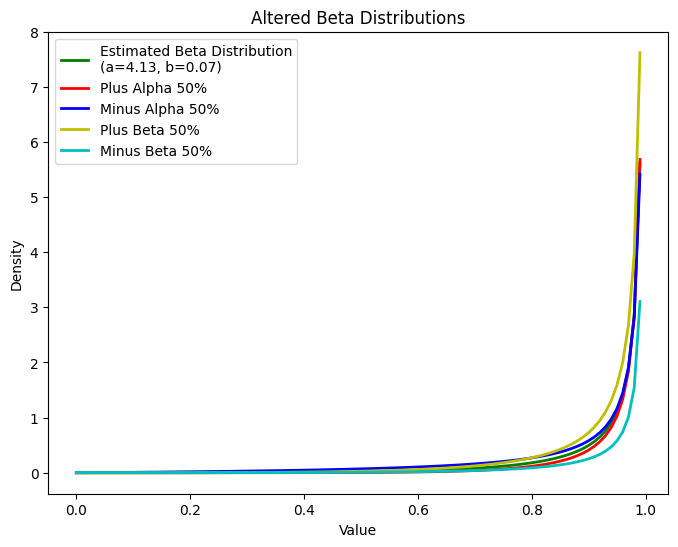

In [2]:
x = np.linspace(0, 1, 100)
baseline = beta.pdf(x, est_alpha, est_beta, loc=0, scale=1)
plus_alpha = beta.pdf(x, est_alpha*1.5, est_beta, loc=0, scale=1)
minus_alpha = beta.pdf(x, est_alpha*0.5, est_beta, loc=0, scale=1)
plus_beta = beta.pdf(x, est_alpha, est_beta*1.5, loc=0, scale=1)
minus_beta = beta.pdf(x, est_alpha, est_beta*0.5, loc=0, scale=1)



plt.figure(figsize=(8, 6))
plt.plot(x, baseline, 'g-', lw=2, label=f'Estimated Beta Distribution\n(a={est_alpha:.2f}, b={est_beta:.2f})')
plt.plot(x,plus_alpha, 'r-', lw=2, label=f'Plus Alpha 50%')
plt.plot(x,minus_alpha, 'b-', lw=2, label=f'Minus Alpha 50%')
plt.plot(x,plus_beta, 'y-', lw=2, label=f'Plus Beta 50%')
plt.plot(x,minus_beta, 'c-', lw=2, label=f'Minus Beta 50%')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Altered Beta Distributions')
plt.legend()
plt.show()


0.9839118780810395 0.0028217754925532884
tensor(0.9828) tensor(0.0028)


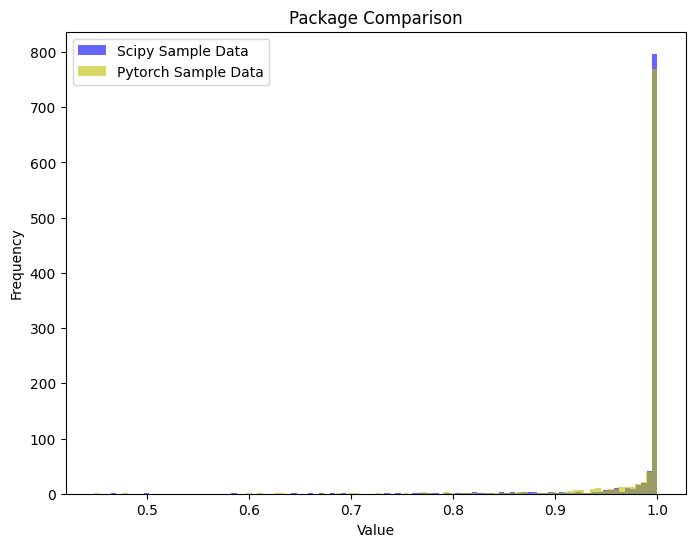

In [31]:
# comparison to couble check eqivalence of scipy beta and pytorch beta

import torch.distributions.beta

scipydist = beta.pdf(x, est_alpha, est_beta, loc=0, scale=1)
pytorchdist = torch.distributions.beta.Beta(est_alpha, est_beta)

torch.manual_seed(1)
spsample = beta.rvs(est_alpha, est_beta, loc=0, scale=1, size=1000, random_state=0)
torchsample = pytorchdist.sample([1000])
print(spsample.mean(), spsample.var())
print(torch.mean(torchsample), torch.var(torchsample))

plt.figure(figsize=(8, 6))

plt.hist(spsample, bins=100, alpha=0.6, color='b', label='Scipy Sample Data')    
plt.hist(torchsample.numpy(), bins=100, alpha=0.6, color='y', label='Pytorch Sample Data')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Package Comparison')
plt.legend()
plt.show()


Seems fine 